In [1]:
#@save
import collections
import hashlib
import math
import os
import random
import re
import shutil
import sys
import tarfile
import time
import zipfile
from collections import defaultdict
import pandas as pd
import requests
from IPython import display
from matplotlib import pyplot as plt
d2l = sys.modules[__name__]

In [2]:
#@save
import torch
import numpy as np
import torchvision
from PIL import Image
from torch import nn
from torch.nn import functional as F
from torch.utils import data
from torchvision import transforms

In [3]:
# 多层感知机
%matplotlib inline
import torch
from d2l import torch as d2l

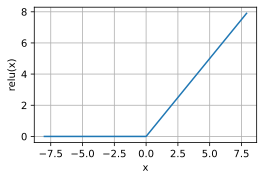

In [4]:
# 激活函数
x = torch.arange(-8.0, 8.0, 0.1, requires_grad = True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize = (4, 2.5)) 
plt.show()

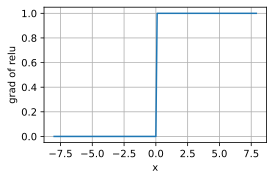

In [5]:
y.backward(torch.ones_like(x), retain_graph = True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize = (4, 2.5)) 
d2l.plt.show()

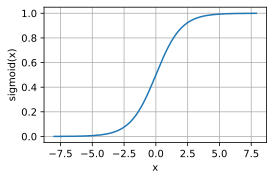

In [6]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad = True)
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize = (4, 2.5)) 
plt.show()

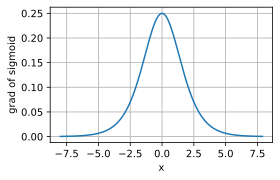

In [7]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad = True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x), retain_graph = True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize = (4, 2.5)) 
d2l.plt.show()

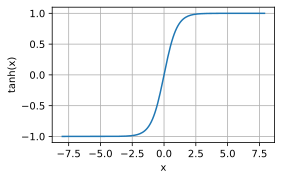

In [8]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad = True)
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize = (4, 2.5)) 
plt.show()

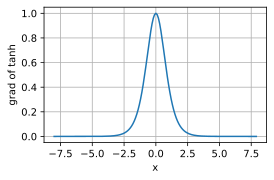

In [9]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad = True)
y = torch.tanh(x)
y.backward(torch.ones_like(x), retain_graph = True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize = (4, 2.5)) 
d2l.plt.show()

In [10]:
# 多层感知机从零开始实现
import torch
from d2l import torch as d2l
from torch import nn

In [11]:
def get_dataloader_workers():  #@save
    """使用2个进程来读取数据"""
    return 2
def load_data_fashion_mnist(batch_size, resize = None):  #@save
    """下载 Fashion-mnist 数据集，然后加载到数据内存中"""
    """
    transforms.ToTensor:
    Convert a ``PIL Image`` or ``numpy.ndarray`` to tensor
    """
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(root = '~', 
                                                    train = True, transform = trans, download = True)
    mnist_test = torchvision.datasets.FashionMNIST(root = '~', 
                                                    train = False, transform = trans, download = True)
    return (data.DataLoader(mnist_train, batch_size, shuffle = True, num_workers = get_dataloader_workers()), 
            data.DataLoader(mnist_test, batch_size, shuffle = False, num_workers = get_dataloader_workers()))

In [12]:
batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)

C:\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [13]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

In [14]:
w1 = nn.Parameter(torch.randn(num_inputs, 
                              num_hiddens, requires_grad = True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad = True))
w2 = nn.Parameter(torch.randn(num_hiddens, 
                              num_outputs, requires_grad = True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad = True))
params = [w1, b1, w2, b2]

In [15]:
def relu(x):
    a = torch.zeros_like(x)
    return torch.max(a, x)

In [16]:
def net(x):
    x = x.reshape((-1, num_inputs))
    H = relu(x @ w1 + b1)
    return (H @ w2 + b2)

In [17]:
loss = nn.CrossEntropyLoss()

In [18]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  #@save
    """训练模型"""
    animator = d2l.Animator(xlabel = 'epoch', xlim = [1, num_epochs], ylim = [0.3, 0.9], 
                        legend = ['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = d2l.train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = d2l.evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc
def predict_ch3(net, test_iter, n= 12):  #@save
    """预测标签"""
    for x, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(x).argmax(axis=1))
    titles = [true + '\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(x[0:n].reshape((n, 28, 28)), 2, 6, titles = titles[0:n])

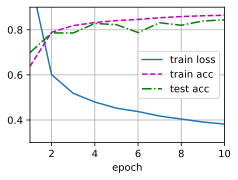

In [19]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

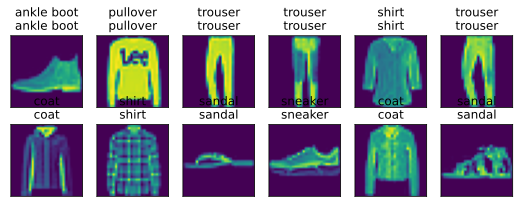

In [20]:
predict_ch3(net, test_iter)

In [21]:
# 多层感知机的简洁实现
import torch
from torch import nn
from d2l import torch as d2l

In [22]:
net = nn.Sequential(nn.Flatten(), 
                    nn.Linear(784, 256), nn.ReLU(), nn.Linear(256, 10))
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std = 0.01)
net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

In [23]:
batch_size, lr, num_epochs = 256, 0.1, 10

In [24]:
loss = nn.CrossEntropyLoss()

In [25]:
trainer = torch.optim.SGD(net.parameters(), lr = lr)

In [26]:
train_iter, tset_iter = load_data_fashion_mnist(batch_size)

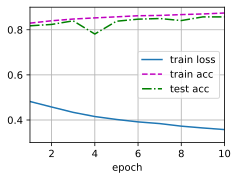

In [28]:
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

In [29]:
# 模型选择， 欠拟合和过拟合
import torch
import numpy as np
import math
from torch import nn
from d2l import torch as d2l

In [30]:
# 生成数据集
max_degree = 20  # 多项式的最大阶数
n_train, n_test = 100, 100  # 训练和测试数据集大小
true_w = np.zeros(max_degree)  # 分配大量的空间
true_w

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [31]:
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])
true_w

array([ 5. ,  1.2, -3.4,  5.6,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

In [32]:
features = np.random.normal(size = (n_train + n_test, 1))
features[:10], features.shape

(array([[ 0.10342518],
        [-0.96671957],
        [ 1.15667657],
        [-0.86659929],
        [ 0.37889232],
        [ 0.32900246],
        [-0.51922965],
        [-0.60248019],
        [ 0.34875018],
        [-0.04599689]]),
 (200, 1))

In [33]:
np.random.shuffle(features)
features[:10]

array([[-0.05298302],
       [-1.029657  ],
       [ 0.10342518],
       [ 1.48029416],
       [ 0.54337606],
       [ 1.74796097],
       [ 0.03256132],
       [ 1.4907002 ],
       [-0.5223784 ],
       [ 1.16332298]])

In [34]:
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
poly_features, poly_features.shape

(array([[ 1.00000000e+00, -5.29830229e-02,  2.80720072e-03, ...,
         -2.04326390e-22,  1.08258298e-23, -5.73585190e-25],
        [ 1.00000000e+00, -1.02965700e+00,  1.06019354e+00, ...,
         -1.64351545e+00,  1.69225719e+00, -1.74244446e+00],
        [ 1.00000000e+00,  1.03425182e-01,  1.06967683e-02, ...,
          1.77274807e-17,  1.83346792e-18,  1.89626755e-19],
        ...,
        [ 1.00000000e+00,  3.78892324e-01,  1.43559393e-01, ...,
          6.83547532e-08,  2.58990913e-08,  9.81296689e-09],
        [ 1.00000000e+00,  7.77491761e-01,  6.04493439e-01, ...,
          1.38620841e-02,  1.07776561e-02,  8.37953886e-03],
        [ 1.00000000e+00, -2.06038457e+00,  4.24518458e+00, ...,
         -2.17330618e+05,  4.47784653e+05, -9.22608590e+05]]),
 (200, 20))

In [35]:
a = np.array([2, 3, 4]).reshape(3, -1); b = np.arange(4).reshape(1, -1)
a.shape, b.shape

((3, 1), (1, 4))

In [36]:
c = np.power(a, b)
a, b, c, c.shape

(array([[2],
        [3],
        [4]]),
 array([[0, 1, 2, 3]]),
 array([[ 1,  2,  4,  8],
        [ 1,  3,  9, 27],
        [ 1,  4, 16, 64]], dtype=int32),
 (3, 4))

In [37]:
np.power(2, 3)

8

In [38]:
np.arange(5), np.arange(5).reshape(1, -1)

(array([0, 1, 2, 3, 4]), array([[0, 1, 2, 3, 4]]))

In [39]:
a = np.arange(5).reshape(-1, 1)  # 列向量
b = np.arange(5).reshape(1, -1)  # 行向量
a, b

(array([[0],
        [1],
        [2],
        [3],
        [4]]),
 array([[0, 1, 2, 3, 4]]))

In [40]:
c = np.power(a, b)
c, c.shape

(array([[  1,   0,   0,   0,   0],
        [  1,   1,   1,   1,   1],
        [  1,   2,   4,   8,  16],
        [  1,   3,   9,  27,  81],
        [  1,   4,  16,  64, 256]], dtype=int32),
 (5, 5))

In [41]:
d = np.array([1, 2, 3, 4, 5])
e = np.dot(c, d)
e

array([   1,   15,  129,  547, 1593])

In [42]:
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)  # gamma: (n - 1)!

In [43]:
# labels 的维度是 (n_train + n_test, )
labels = np.dot(poly_features, true_w)
labels.shape

(200,)

In [44]:
labels += np.random.normal(scale = 0.1, size = labels.shape)

In [45]:
# 将 NumPy ndarray 转换为 tensor
true_w, features, poly_features, labels = [torch.tensor(x, dtype = torch.float32) 
                                           for x in [true_w, features, poly_features, labels]]
features[:2], poly_features[:2, :], labels[:2]

(tensor([[-0.0530],
         [-1.0297]]),
 tensor([[ 1.0000e+00, -5.2983e-02,  1.4036e-03, -2.4789e-05,  3.2835e-07,
          -3.4794e-09,  3.0725e-11, -2.3256e-13,  1.5402e-15, -9.0671e-18,
           4.8040e-20, -2.3139e-22,  1.0217e-24, -4.1639e-27,  1.5758e-29,
          -5.5661e-32,  1.8432e-34, -5.7445e-37,  1.6909e-39, -4.7154e-42],
         [ 1.0000e+00, -1.0297e+00,  5.3010e-01, -1.8194e-01,  4.6834e-02,
          -9.6445e-03,  1.6551e-03, -2.4345e-04,  3.1334e-05, -3.5848e-06,
           3.6912e-07, -3.4551e-08,  2.9647e-09, -2.3481e-10,  1.7270e-11,
          -1.1855e-12,  7.6289e-14, -4.6207e-15,  2.6432e-16, -1.4324e-17]]),
 tensor([4.7787, 0.9102]))

In [46]:
# 对模型进行训练和测试
class Accumulator:  #@save
    """在 n 个变量上累加"""
    def __init__(self, n):
        self.data = [0.0] * n
    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]
    def reset(self):
        self.data = [0.0] * len(self.data)
    def __getitem__(self, idx):
        return self.data[idx]
def evaluate_loss(net, data_iter, loss):  #@save
    """评估给定数据集上的模型损失"""
    metric = d2l.Accumulator(2)  # 损失的总和，样本数量
    for x, y in data_iter:
        out = net(x)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

In [47]:
import torch
from torch.utils import data
def load_array(data_arrays, batch_size, is_train = True):  #@save
    """构造一个 Pytorch 数据迭代器"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle = is_train)

In [48]:
from IPython import display
import matplotlib.pyplot as plt
def use_svg_display():
    # 使用 svg 格式在 jupyter 中绘图
    display.set_matplotlib_formats('svg')
def set_figsize(figsize = (3.5, 2.5)):
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴。"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, 
         xlim=None, ylim=None, xscale='linear', yscale='linear', 
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点。"""
    if legend is None:
        legend = []
    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()
    # 如果 `X` 有⼀个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or 
                isinstance(X, list) and not hasattr(X[0], "__len__"))
    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

In [49]:
class Animator:  #@save
    """在动画中绘制数据"""
    def __init__(self, xlabel = None, ylabel = None, 
                 legend = None, xlim = None, ylim = None, 
                 xscale = 'linear', yscale = 'linear', 
                 fmts = ('-', 'm--', 'g-.', 'r:'), 
                 nrows = 1, ncols = 1,  figsize = (3.5, 2.5)):
        """增量的绘制多条线"""
        if legend is None:
            legend = []
        use_svg_display()
        self.fig, self.axes = plt.subplots(nrows, ncols, figsize = figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes,]
        self.config_axes = lambda: set_axes(self.axes[0], xlabel, ylabel, xlim, ylim, 
                                                xscale, yscale, legend)
        self.x, self.y, self.fmts = None, None, fmts
    def add(self, x, y):
        """向表中添加多个数据点"""
        if not hasattr(y, '__len__'):
            y = [y]
        n = len(y)
        if not hasattr(x, '__len__'):
            x = [x] * n
        if not self.x:
            self.x = [[] for _ in range(n)]
        if not self.y:
            self.y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.x[i].append(a)
                self.y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.x, self.y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait = True)

In [50]:
def accuracy(y_hat, y):  #@save
    """计算预测正确的总数"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis = 1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())
def evaluate_accuracy(net, data_iter):  #@save
    """计算指定数据集上模型的精度"""
    if isinstance(net, torch.nn.Module):
        net.eval()  # 将模型设置为评估模式
    metric = Accumulator(2)  # 正确预测数，预测总数
    for x, y in data_iter:
        metric.add(accuracy(net(x), y), y.numel())
    return metric[0] / metric[1]
def train_epoch_ch3(net, train_iter, loss, updater):  #@save
    """训练模型一个迭代周期"""
    if isinstance(net, torch.nn.Module):
        net.train()
    metric = Accumulator(3)
    for x, y in train_iter:
        y_hat = net(x)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            updater.zero_grad()
            l.backward()
            updater.step()
            metric.add(float(l) * len(y), 
                       accuracy(y_hat, y), y.size().numel())
        else:
            l.sum().backward()
            updater(x.shape[0])
            metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    """返回训练损失和训练精度"""
    return metric[0] / metric[2], metric[1] / metric[2]

In [51]:
def train(train_features, test_features, 
          train_labels, test_labels, num_epochs = 400):
    loss = nn.MSELoss()
    inputs_shape = train_features.shape[-1]
    # 不设置偏置，因为我们已经在多项式特征中实现了它
    net = nn.Sequential(nn.Linear(inputs_shape, 1, bias = False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = load_array((train_features, train_labels.reshape(-1, 1)), 
                            batch_size)
    test_iter = load_array((test_features, test_labels.reshape(-1, 1)), 
                           batch_size, is_train = False)
    trainer = torch.optim.SGD(net.parameters(), lr = 0.01)
    animator = Animator(xlabel = 'epoch', ylabel = 'loss', 
                        yscale = 'log', xlim = [1, num_epochs], 
                        ylim = [1e-3, 1e2], legend = ['train', 'test'])
    for epoch in range(num_epochs):
        train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss), 
                                     evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy()) 

In [52]:
a = np.arange(12).reshape(3, 4)
a.shape, a.shape[-1]

((3, 4), 4)

In [ ]:
# 三阶多项式函数拟合(正态)
train(poly_features[:n_train, :4], poly_features[n_train:, :4], 
      labels[:n_train], labels[n_train:])

In [ ]:
# 三阶多项式函数拟合(欠拟合)
# 从多项式维度中选择前2个维度
train(poly_features[:n_train, :2], poly_features[n_train:, :2], 
      labels[:n_train], labels[n_train:])

In [ ]:
# 三阶多项式函数拟合(过拟合)
# 从多项式维度中选择所有维度
train(poly_features[:n_train, :], poly_features[n_train:, :], 
      labels[:n_train], labels[n_train:], num_epochs = 1500)

In [53]:
# 权重衰减
def synthetic_data(w, b, num_examples):  #@save
    """生成 y = xw + b + 噪声"""
    x = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(x, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return x, y.reshape((-1, 1))
def linreg(x, w, b):  #@save
    """线性回归模型"""
    return torch.matmul(x, w) + b
def squared_loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [54]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

In [55]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = synthetic_data(true_w, true_b, n_train)
train_iter = load_array(train_data, batch_size)
test_data = synthetic_data(true_w, true_b, n_test)
test_iter = load_array(test_data, batch_size, is_train = False)

In [ ]:
# 从零开始实现
# 初始化模型参数
def init_params():
    w = torch.normal(0, 1, size = (num_inputs, 1), requires_grad = True)
    b = torch.zeros(1, requires_grad = True)
    return [w, b]

In [ ]:
# 定义 L2 范数惩罚
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

In [ ]:
# 定义训练代码实现
def train(lambd):
    w, b = init_params()
    net, loss = lambda x:linreg(x, w, b), squared_loss
    num_epochs, lr = 100, 0.003
    animator = Animator(xlabel = 'epochs', ylabel = 'loss', 
                        yscale = 'log', xlim = [5, num_epochs], 
                        legend = ['train', 'test'])
    for epoch in range(num_epochs):
        for x, y in train_iter:
            with torch.enable_grad():
                # 增加 L2 范数惩罚项，广播机制使 l2_penalty(w) 成为一个长度为 batch_size 的向量
                l = loss(net(x), y) + lambd * l2_penalty(w)
            l.sum().backward()
            sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                                     evaluate_loss(net, test_iter, loss)))
    print('w 的 l2 范数是:', torch.norm(w).item())

In [ ]:
# 忽略正则化直接训练
train(lambd = 0)

In [ ]:
# 使用权重衰减
train(lambd = 3)

In [ ]:
# 权重衰减简洁实现
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss()
    num_epochs, lr = 100, 0.003
    # 偏置不设置衰减
    trainer = torch.optim.SGD([{'params':net[0].weight, 'weight_decay':wd}, 
                               {'params':net[0].bias}], lr = lr)
    
    animator = Animator(xlabel = 'epochs', ylabel = 'loss', 
                        yscale = 'log', xlim = [5, num_epochs], 
                        legend = ['train', 'test'])
    for epoch in range(num_epochs):
        for x, y in train_iter:
            with torch.enable_grad():
                trainer.zero_grad()
                l = loss(net(x), y)
            l.backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                                     evaluate_loss(net, test_iter, loss)))
    print('w 的 l2 范数是:', net[0].weight.norm().item())

In [ ]:
train_concise(0)

In [ ]:
train_concise(3)

In [ ]:
# Dropout 正则化
import torch
from d2l import torch as d2l
from torch import nn

In [ ]:
# 从零开始实现
def dropout_layer(x, dropout):
    assert 0 <= dropout <= 1
    # 在该情况下，所有元素都被丢弃
    if dropout == 1:
        return torch.zeros_like(x)
    # 在该情况下，所有元素都被保留
    if dropout == 0:
        return x
    mask = (torch.Tensor(x.shape).uniform_(0, 1) > dropout).float()
    return mask * x / (1.0 - dropout)

In [ ]:
x = torch.arange(16, dtype = torch.float32).reshape((2, 8))

In [ ]:
x.shape

In [ ]:
a = torch.Tensor(x.shape).uniform_(0, 1)
a

In [ ]:
a > 0.5

In [ ]:
(a > 0.5).float()

In [ ]:
dropout_layer(x, 0.)

In [ ]:
dropout_layer(x, 0.5)

In [ ]:
dropout_layer(x, 1)

In [ ]:
# 定义模型参数
num_inputs, num_hiddens1, num_hiddens2, num_outputs = 784, 256, 256, 10

In [ ]:
# 定义模型
dropout1, dropout2 = 0.2, 0.5
class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, 
                 num_hiddens1, num_hiddens2, is_train = True):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.training = is_train
        self.lin1 = nn.Linear(num_inputs, num_hiddens1)
        self.lin2 = nn.Linear(num_hiddens1, num_hiddens2)
        self.lin3 = nn.Linear(num_hiddens2, num_outputs)
        self.relu = nn.ReLU()
    def forward(self, x):
        H1 = self.relu(self.lin1(x.reshape((-1, self.num_inputs))))
        if self.training == True:
            H1 = dropout_layer(H1, dropout1)
        H2 = self.relu(self.lin2(H1))
        if self.training == True:
            H2 = dropout_layer(H2, dropout2)
        out = self.lin3(H2)
        return out

In [ ]:
net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)

In [ ]:
# 训练和测试
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss()
train_iter, test_iter = load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr = lr)
train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

In [ ]:
# 简洁实现
dropout2, dropout1 = 0.2, 0.5
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 256), nn.ReLU(), 
                    nn.Dropout(dropout1), 
                    nn.Linear(256, 256), nn.ReLU(), 
                    nn.Dropout(dropout2), 
                    nn.Linear(256, 10))

In [ ]:
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std = 0.01)

In [ ]:
net.apply(init_weights)

In [ ]:
trainer = torch.optim.SGD(net.parameters(), lr = lr)
train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

In [ ]:
# 正向传播、反向传播和计算图

In [ ]:
#  数值稳定性和模型初始化
%matplotlib inline
from d2l import torch as d2l
import torch

In [ ]:
# 梯度消失
x = torch.arange(-8.0, 8.0, 0.1, requires_grad = True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x))
d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()],
         legend = ['sigmoid', 'gradient'], figsize = (4.5, 2.5))

In [ ]:
# 梯度爆炸
M = torch.normal(0, 1, size = (4, 4))
print('一个矩阵:\n', M)

In [ ]:
for i in range(100):
    M = torch.mm(M, torch.normal(0, 1, size = (4, 4)))
print('乘以100个矩阵后:\n', M)

In [ ]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad = True)
y = torch.relu(x)
y.backward(torch.ones_like(x))
d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()],
         legend = ['sigmoid', 'gradient'], figsize = (4.5, 2.5))

In [ ]:
# 环境和分布偏移

# 实战 Kaggle 比赛: 预测房价

#### 1.下载和缓存数据集

In [ ]:
import hashlib
import os
import tarfile
import zipfile
import requests

In [ ]:
DATA_HUB = dict()
DATA_URL = 'http://d2l-data.s3-accelerate.amazonaws.com/'

In [ ]:
# 下⾯的 download 函数⽤来下载数据集，将数据集缓存在本地⽬录（默认情况下为../data）中，并返回下载⽂件的名称
def download(name, cache_dir=os.path.join('C:/Users/jiangyu/Desktop/cvtf', 'data')): #@save
    """下载⼀个DATA_HUB中的⽂件，返回本地⽂件名。"""
    assert name in DATA_HUB, f"{name} 不存在于 {DATA_HUB}."
    url, sha1_hash = DATA_HUB[name]
    os.makedirs(cache_dir, exist_ok = True)
    fname = os.path.join(cache_dir, url.split('/')[-1])
    if os.path.exists(fname):
        sha1 = hashlib.sha1()
        with open(fname, 'rb') as f:
            while True:
                data = f.read(1048576)
                if not data:
                    break
                sha1.update(data)
        if sha1.hexdigest() == sha1_hash:
            return fname # Hit cache
    print(f'正在从{url}下载{fname}...') 
    r = requests.get(url, stream=True, verify=True)
    with open(fname, 'wb') as f:
        f.write(r.content)
    return fname

In [ ]:
def download_extract(name, folder = None):
    """下载并解压了 zip/tar 文件"""
    fname = download(name)
    base_dir = os.path.dirname(fname)
    data_dir, ext = os.path.splitext(fname)
    if ext == '.zip':
        fp = zipfile.ZipFile(fname, 'r')
    elif ext in ('.tar', '.gz'):
        fp = tarfile.open(fname, 'r')
    else:
        assert False, '只有 zip/tar 文件可以压缩。'
    fp.extractall(base_dir)
    return os.path.join(base_dir, folder) if folder else data_dir
def download_all():
    """下载 DATA_HUB 中的所有文件"""
    for name in DATA_HUB:
        download(name)

In [ ]:
#### 2.Kaggle

In [ ]:
# kaggle 是一个机器学习比赛平台

In [ ]:
# 3.访问和读取数据集

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
DATA_HUB['kaggle_house_train'] = (DATA_URL + 'kaggle_house_pred_train.csv', 
                                  '585e9cc93e70b39160e7921475f9bcd7d31219ce')
DATA_HUB['kaggle_house_test'] = (DATA_URL + 'kaggle_house_pred_test.csv', 
                                 'fa19780a7b011d9b009e8bff8e99922a8ee2eb90')

In [ ]:
train_data = pd.read_csv(download('kaggle_house_train'))
test_data = pd.read_csv(download('kaggle_house_test'))

In [ ]:
train_data.shape, test_data.shape

In [ ]:
# 看前四个和最后两个特征，以及相应标签（房价）
train_data.iloc[0:4, [0, 1, 2, 3, -2, -1]]

In [ ]:
# 删除 id 这一列
all_features = pd.concat((train_data.iloc[:, 1:-1], test_data.iloc[:, 1:]))

In [ ]:
all_features

#### 4.数据预处理

In [ ]:
numeric_features = all_features.dtypes[all_features.dtypes != 
                                       'object'].index
all_features[numeric_features] = all_features[numeric_features].apply(
    lambda x: (x - x.mean()) / x.std())
# 在标准化数据之后，所有数据都意味着消失，因此我们可以将缺失值设置为0
all_features[numeric_features] = all_features[numeric_features
                                             ].fillna(0)

In [ ]:
numeric_features

In [ ]:
all_features

In [ ]:
# `Dummy_na=True` 将“na”（缺失值）视为有效的特征值，并为其创建指⽰符特征
all_features = pd.get_dummies(all_features, dummy_na = True)
all_features

In [ ]:
all_features.shape

In [ ]:
n_train = train_data.shape[0]
n_train

In [ ]:
# 通过values属性，从pandas格式中提取NumPy格式，并将其转换为张量表⽰⽤于训练
train_features = torch.tensor(all_features[:n_train].values, 
                              dtype = torch.float32)
train_features

In [ ]:
test_features = torch.tensor(all_features[n_train:].values, 
                            dtype = torch.float32)
test_features

In [ ]:
train_labels = torch.tensor(train_data.SalePrice.values.reshape(-1, 1), 
                           dtype = torch.float32)
train_labels

#### 5.训练

In [ ]:
loss = nn.MSELoss()
in_features = train_features.shape[1]
in_features

In [ ]:
def get_net():
    net = nn.Sequential(nn.Linear(in_features, 1))
    return net

In [ ]:
def log_rmse(net, features, labels):
    # 为了在取对数时进一步稳定数值，将小于1的值设置为1
    clipped_preds = torch.clamp(net(features), 1, float('inf'))
    rmse = torch.sqrt(loss(torch.log(clipped_preds), 
                           torch.log(labels)))
    return rmse.item()

In [ ]:
def load_array(data_arrays, batch_size, is_train = True):  #@save
    """构造一个 Pytorch 数据迭代器"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle = is_train)

In [ ]:
def train(net, train_features, train_labels, 
          test_features, test_labels, 
          num_epochs, learning_rate, weight_decay, batch_size):
    train_ls, test_ls = [], []
    train_iter = d2l.load_array((train_features, train_labels), 
                                batch_size)
    optimizer = torch.optim.Adam(net.parameters(), lr = learning_rate, 
                                weight_decay = weight_decay)
    for epoch in range(num_epochs):
        for x, y in train_iter:
            optimizer.zero_grad()
            l = loss(net(x), y)
            l.backward()
            optimizer.step()
        train_ls.append(log_rmse(net, train_features, train_labels))
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls

#### 6.K折交叉验证

In [ ]:
def get_k_fold_data(k, i, x, y):
    assert k > 1
    fold_size = x.shape[0] // k
    x_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size)
        x_part, y_part = x[idx, :], y[idx]
        if j == i:
            x_valid, y_valid = x_part, y_part
        elif x_train is None:
            x_train, y_train = x_part, y_part
        else:
            x_train = torch.cat([x_train, x_part], 0)
            y_train = torch.cat([y_train, y_part], 0)
    return x_train, y_train, x_valid, y_valid

In [ ]:
def k_fold(k, x_train, y_train, num_epochs, 
           learning_rate, weight_decay,  batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, x_train, y_train)
        net = get_net()
        train_ls, valid_ls = train(net, *data, 
                                   num_epochs, learning_rate,
                                   weight_decay, batch_size)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]
        if i == 0:
            d2l.plot(list(range(1, num_epochs + 1)), 
                     [train_ls, valid_ls], xlabel = 'epoch',
                     ylabel = 'rmse', xlim = [1, num_epochs], 
                     legend = ['train', 'valid'], yscale = 'log')
        print(f"fold{i + 1}:, train log rmse {float(train_ls[-1]):f},\
              valid log rmse {float(valid_ls[-1]):f}")
    return train_l_sum / k, valid_l_sum / k

#### 7.模型选择

In [ ]:
k, num_epochs, lr, weight_decay, batch_size = 5, 100, 5, 0, 64

In [ ]:
train_l, valid_l = k_fold(k, train_features, train_labels, 
                          num_epochs, lr, weight_decay, batch_size)
print(f'{k}-折验证: 平均训练log rmse: {float(train_l):f}, ' 
      f'平均验证log rmse: {float(valid_l):f}')

#### 8.提交 kaggle 预测

In [ ]:
def train_and_pred(train_features, test_features, train_labels, 
                   test_data, num_epochs, 
                   lr, weight_decay, batch_size):
    net = get_net()
    train_ls, _ = train(net, train_features, train_labels, None, None, 
                        num_epochs, lr, weight_decay, batch_size)
    d2l.plot(np.arange(1, num_epochs + 1), [train_ls], xlabel = 'epoch', 
             ylabel = 'log rmse', xlim = [1, num_epochs], yscale = 'log')
    print(f"train log rmse:{float(train_ls[-1]):f}")
    # 将网络用于测试集
    preds = net(test_features).detach().numpy()
    # 将其重新格式化导出到 kaggle
    test_data['SalePrice'] = pd.Series(preds.reshape(1, -1)[0])
    submission = pd.concat([test_data['Id'], 
                            test_data['SalePrice']], axis = 1)
    submission.to_csv('submission.csv', index = False)

In [ ]:
train_and_pred(train_features, test_features, 
               train_labels, test_data, num_epochs, lr, weight_decay, 
               batch_size)